In [43]:
from pathlib import Path
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import re
from joblib import Parallel, delayed, parallel_backend

In [38]:
work_dir = Path('/mnt/share/raheppt1/data/metvol/interim/ctorgan/nifti/nifti_lowres/labels')

In [39]:
# extract keys
subj_keys = set()
for f in work_dir.glob('*.nii.gz'):
    subj_keys.add(re.match('([0-9]{3}).*', f.name).group(1))

In [45]:
def process_file(k):
    files = list(work_dir.glob(f'**/*{k}*.nii*'))
    files.sort()
    labels = [nib.load(f) for f in files]
    affine = labels[0].affine
    labels = np.stack([l.get_fdata()for l in labels], axis=0)
    background = np.invert(np.any(labels, axis=0, keepdims=True))
    data = np.concatenate([background, labels], axis=0)
    data = np.argmax(data, axis=0).astype(np.uint8)
    result = nib.Nifti1Image(data, affine)
    nib.save(result, work_dir.joinpath(f'{k}_labels_3mm_low.nii.gz'))
    return k

Parallel(n_jobs=10)(delayed(process_file)(k) for k in subj_keys)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [50]:
test = work_dir.joinpath('052_labels_3mm_low.nii.gz')
test = nib.load(test).get_fdata()

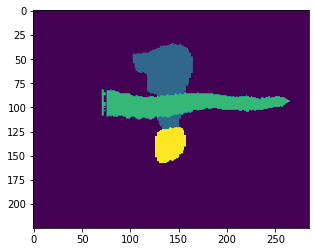

In [51]:
plt.imshow(np.max(test,axis=1))